## Loan Status Prediction From Lending Club Dataset

Import the necessary libraries for machine learning, data analysis and data visualization

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Set-Up

Read in the information about each column in the larger dataset into a dataframe

In [166]:
data = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [167]:
data.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


Read in the .csv data file which will be analyzed to predict the status of loans.

In [168]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [169]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


Returns summary statistics of each column in the dataframe. From this function we can see that there is quite a bit of null data that will need to be filled. We can also see that there are a few categorical columns which we will need to feature engineer so that our algorithms can use them in the predictions.

In [170]:
df.describe(include="all")

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USNS Johnson\nFPO AE 05113
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [171]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS + VISUALIZATION

Creates a countplot of the different loan statuses. We can see that a vast majority of the loans are fully paid off. Thus, we will need a very accurate model, otherwise, simply predicting that every loan will be fully paid will outperform a poor model.

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='loan_status', ylabel='count'>

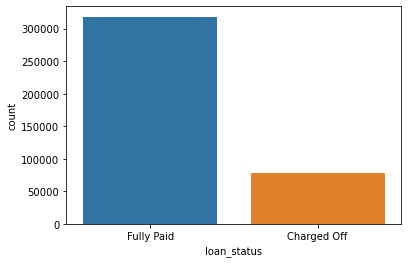

In [172]:
sns.countplot(df["loan_status"])

Return the information about each column of the dataframe to see which columns have a data type of "object" and thus need to be feature engineered.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

Accesses first 20 loan amount values to get an idea of format of variables, and general idea of the range of possible values. Histogram plot shows that a majority of the loans range from 0-2,000 dollars.

In [174]:
df['loan_amnt'][0:20]

0     10000.0
1      8000.0
2     15600.0
3      7200.0
4     24375.0
5     20000.0
6     18000.0
7     13000.0
8     18900.0
9     26300.0
10    10000.0
11    35000.0
12     7500.0
13    35000.0
14    25975.0
15    18000.0
16    32350.0
17    11200.0
18    34000.0
19    20000.0
Name: loan_amnt, dtype: float64

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

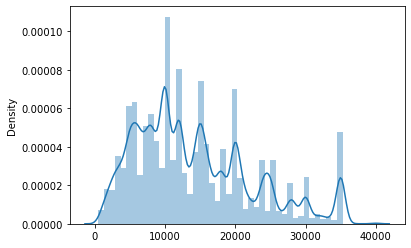

In [175]:
sns.distplot(x=df['loan_amnt'], kde = True)

Creates a boxplot which shows how the interest rate affects the status of the loan, we can see that loans which are not paid off typically have higher interest rates as opposed to those which are paid off.

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

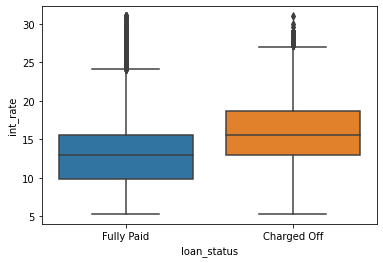

In [176]:
sns.boxplot(x='loan_status', y='int_rate', data=df)

Box plot which shows the difference between the distribution of loan amound depending on the loan status. This graph tells us that loans which are not paid off tend to have higher amounts.

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

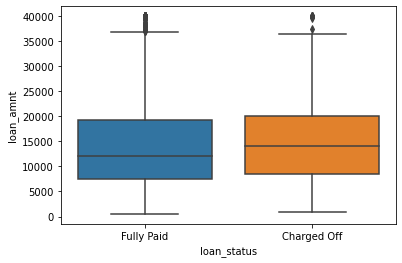

In [177]:
sns.boxplot(x="loan_status", y="loan_amnt", data=df)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [179]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

Below is a countplot which shows how many loans are on a 36 month and 60 month term, respectively. It also shows what the ratio of fully paid 60 month loans to fully paid 30 month loans. From this plot, we can see that a higher percentage of 60 month loans fail compared to 30 month loan. Therefore, this column will be a useful feature, and getting therefore, dummy variables are generated.

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='loan_status', ylabel='count'>

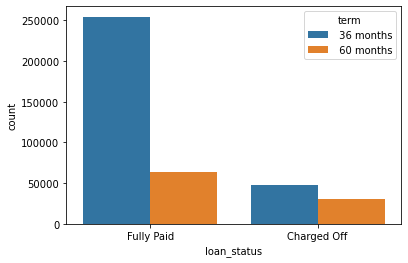

In [180]:
sns.countplot(df['loan_status'], hue = df['term'])

In [181]:
df = pd.get_dummies(df, columns=['term'], drop_first = True)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  object 
 4   sub_grade             396030 non-null  object 
 5   emp_title             373103 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [183]:
df['installment'].unique

<bound method Series.unique of 0         329.48
1         265.68
2         506.97
3         220.65
4         609.33
           ...  
396025    217.38
396026    700.42
396027    161.32
396028    503.02
396029     67.98
Name: installment, Length: 396030, dtype: float64>

In [184]:
data

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [185]:
data.columns

Index(['Description'], dtype='object')

In [186]:
print(data.iloc(0))

In [187]:
data.attrs

{}

In [188]:
data.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [189]:
data.to_numpy()[3]

array(['The monthly payment owed by the borrower if the loan originates.'],
      dtype=object)

The boxplot below shows that the distribution of monthly installments for failed loans is higher than the distribution for paid loans. 

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

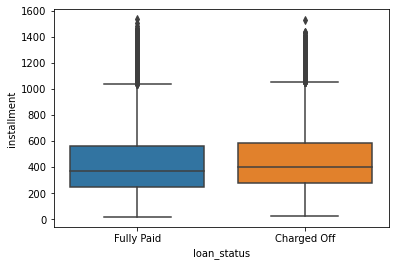

In [190]:
sns.boxplot(y=df['installment'], x=df['loan_status'])

In [191]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term_ 60 months
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539,0.393862
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450,0.434594
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628,0.153378
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162,0.060330
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558,0.036508
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732,0.079575
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408,-0.018758
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532,0.084787
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751,0.055166
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035,0.101346


Heatmap which shows the correlation of all categorical columns in the dataset with one another.

<AxesSubplot:>

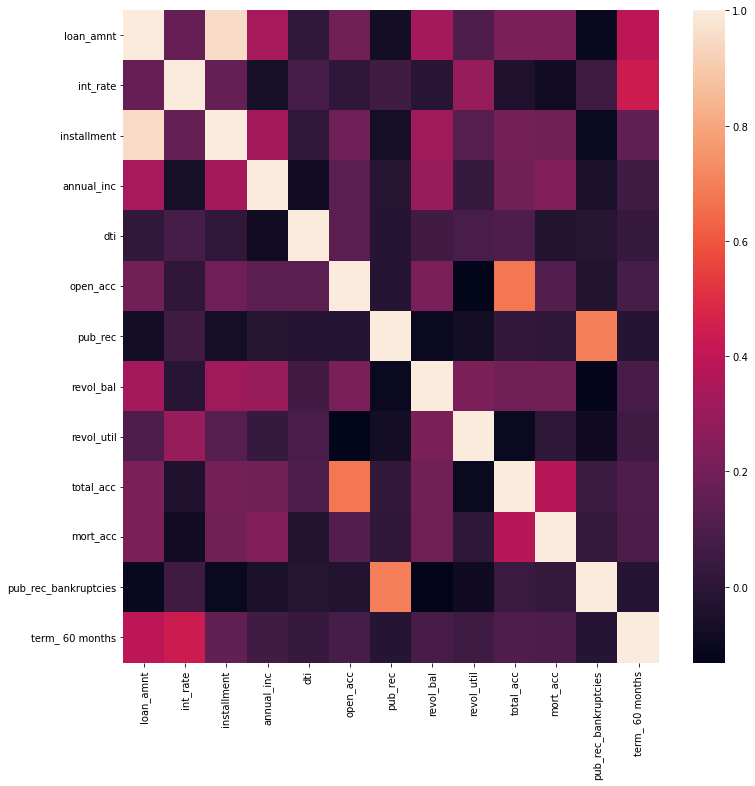

In [192]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr())

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  object 
 4   sub_grade             396030 non-null  object 
 5   emp_title             373103 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [194]:
df['loan_status'].unique

<bound method Series.unique of 0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object>

Analysis of the grade feature in the dataset. Histogram shows that most loans have a high grade while fewer have a low grade (histogram is skewed left).

In [195]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [196]:
df_null = df.isnull()

In [197]:
df_null.shape

(396030, 27)

<AxesSubplot:xlabel='grade', ylabel='Count'>

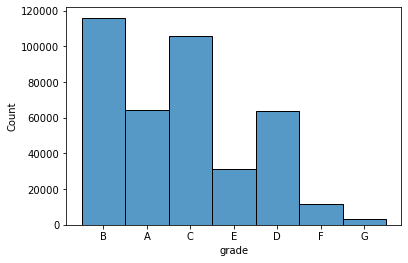

In [198]:
sns.histplot(df['grade'])

In [199]:
def percentage_of_loan_failure(grade):
    fail = 0
    paid = 0
    for x,y in zip(df['loan_status'], df['grade']):
        
        if x == "Charged Off" and y == grade:
            
            fail += 1
        
        if x == "Fully Paid" and y == grade:
            
            paid +=1
            
    return (fail/(paid+fail))*100.0
    

In [200]:
percentage_of_loan_failure("A")

6.28787760761525

In [201]:
percentage_of_loan_failure("B")

12.573049009636437

In [202]:
percentage_of_loan_failure("C")

21.180899544283733

In [203]:
percentage_of_loan_failure("D")

28.86782948177067

In [204]:
percentage_of_loan_failure("E")

37.36344004065041

In [205]:
percentage_of_loan_failure("F")

42.78797145769623

In [206]:
percentage_of_loan_failure("G")

47.83889980353634

Assigns numerical values to each element in the column.

In [207]:
df['grade'] = df['grade'].replace(["A","B", "C", "D", "E", "F", "G"], [0,1,2,3,4,5,6])

In [208]:
df.corr()

,loan_amnt,int_rate,installment,grade,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term_ 60 months
loan_amnt,1.000000,0.168921,0.953929,0.175198,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539,0.393862
int_rate,0.168921,1.000000,0.162758,0.952473,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450,0.434594
installment,0.953929,0.162758,1.000000,0.157322,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628,0.153378
grade,0.175198,0.952473,0.157322,1.000000,-0.045862,0.078140,0.019321,0.068778,-0.008639,0.258950,-0.025932,-0.075255,0.061583,0.457524
annual_inc,0.336887,-0.056771,0.330381,-0.045862,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162,0.060330
dti,0.016636,0.079038,0.015786,0.078140,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558,0.036508
open_acc,0.198556,0.011649,0.188973,0.019321,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732,0.079575
pub_rec,-0.077779,0.060986,-0.067892,0.068778,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408,-0.018758
revol_bal,0.328320,-0.011280,0.316455,-0.008639,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532,0.084787
revol_util,0.099911,0.293659,0.123915,0.258950,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751,0.055166


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  object 
 5   emp_title             373103 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [210]:
len(df['sub_grade'].values)

396030

In [211]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

In [212]:
def percentage_of_loan_failure_sub_grade(sub_grade):
    fail = 0
    paid = 0
    for x,y in zip(df['loan_status'], df['sub_grade']):
        
        if x == "Charged Off" and y == sub_grade:
            
            fail += 1
        
        if x == "Fully Paid" and y == sub_grade:
            
            paid +=1
            
    return (fail/(paid+fail))*100.0
    

Checks to see which subgrades coorelate with high rates of loan failure, creates a plot which shows that the lower the grade, the higher the likelihood that the loan fails. Replaces the subgrade categorical values with numeric values.

In [213]:
unique_sub_grades = df['sub_grade'].unique()
unique_sub_percent = []
for i in unique_sub_grades:
    print(str(i))
    print(percentage_of_loan_failure_sub_grade(str(i)))
    unique_sub_percent.append((i,percentage_of_loan_failure_sub_grade(str(i))))
    

B4
13.839303152220616
B5
15.50373556712701
B3
12.335396736072031
A2
4.818647433887321
C5
24.506687130015347
C3
21.841572027708402
A1
2.8677150786308974
B2
10.8513002889531
C1
17.369622179021217
A5
8.490769729029472
E4
39.302368961014736
A4
7.023877382988156
A3
5.805597579425113
D1
26.380291377477644
C2
19.75199291408326
B1
9.858200396204776
D3
28.421827701873514
D5
32.01030927835051
D2
28.03383270016486
E1
34.40697233800682
E2
36.73798950343157
E5
40.31058617672791
F4
45.60716284275322
E3
38.037699371677135
D4
31.131508964570642
G1
46.12476370510397
F5
48.67573371510379
G2
48.275862068965516
C4
23.535502958579883
F1
38.744343891402714
F3
43.61329833770778
G5
50.31645569620253
G4
44.919786096256686
F2
42.48011569052784
G3
51.08695652173913


In [214]:
unique_sub_percent

[('B4', 13.839303152220616),
 ('B5', 15.50373556712701),
 ('B3', 12.335396736072031),
 ('A2', 4.818647433887321),
 ('C5', 24.506687130015347),
 ('C3', 21.841572027708402),
 ('A1', 2.8677150786308974),
 ('B2', 10.8513002889531),
 ('C1', 17.369622179021217),
 ('A5', 8.490769729029472),
 ('E4', 39.302368961014736),
 ('A4', 7.023877382988156),
 ('A3', 5.805597579425113),
 ('D1', 26.380291377477644),
 ('C2', 19.75199291408326),
 ('B1', 9.858200396204776),
 ('D3', 28.421827701873514),
 ('D5', 32.01030927835051),
 ('D2', 28.03383270016486),
 ('E1', 34.40697233800682),
 ('E2', 36.73798950343157),
 ('E5', 40.31058617672791),
 ('F4', 45.60716284275322),
 ('E3', 38.037699371677135),
 ('D4', 31.131508964570642),
 ('G1', 46.12476370510397),
 ('F5', 48.67573371510379),
 ('G2', 48.275862068965516),
 ('C4', 23.535502958579883),
 ('F1', 38.744343891402714),
 ('F3', 43.61329833770778),
 ('G5', 50.31645569620253),
 ('G4', 44.919786096256686),
 ('F2', 42.48011569052784),
 ('G3', 51.08695652173913)]

In [215]:
subgrades = []
percents = []
for i in unique_sub_percent:
    
    subgrades.append(i[0])
    percents.append(i[1])

    

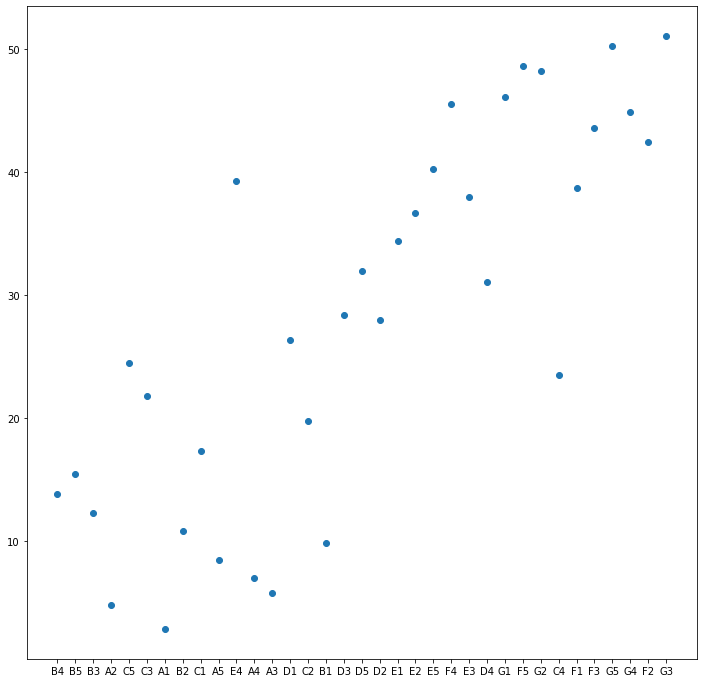

In [216]:
plt.figure(figsize=(12,12))
plt.scatter(subgrades, percents)

In [217]:
sub = []
for i in range(0,len(subgrades)):
    
    sub.append(i)
    
    
len(["A1","A2","A3","A4","A5","B1","B2","B3","B4","B5", "C1","C2","C3","C4","C5", "D1","D2","D3","D4","D5",  "E1","E2","E3","E4","E5",
    "F1","F2","F3","F4","F5", "G1","G2","G3","G4","G5"])

35

In [218]:
df['sub_grade'] = df['sub_grade'].replace(["A1","A2","A3","A4","A5","B1","B2","B3","B4","B5", "C1","C2","C3","C4","C5", "D1","D2","D3","D4","D5",  "E1","E2","E3","E4","E5",
    "F1","F2","F3","F4","F5", "G1","G2","G3","G4","G5"], sub)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_title             373103 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

Analysis of the employee job title column of the dataset, realized there are too many unique values and there is no way to check coorelation of job title with coorelation of loan failure, and thus that column will be dropped from the dataset later on.

In [220]:
data.to_numpy()[6]

array(['The job title supplied by the Borrower when applying for the loan.*'],
      dtype=object)

In [221]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [222]:
job_types = df['emp_title'].value_counts()[0:1000].index.tolist()

In [223]:
job_type_num = []
for x,y in zip(range(0,len(job_types)), range(0,1000)):
    
    job_type_num.append(y)

In [224]:
def job_loan_fail(job):
    
    paid = 0
    not_paid = 0
    
    for x,y in zip(df['emp_title'], df['loan_status']):
        
      
        
        if x == job and y == "Fully Paid":
            
            paid +=1 
            
        
        if x == job and y == "Charged Off":
            
            not_paid +=1
            
    
    return (not_paid)/(paid+not_paid) * 100.0
    

In [225]:
job_percents = []
for i in job_types[0:10]:
    
    job_percents.append(job_loan_fail(i))

In [226]:
job_percents[0:10]

[19.526087947140578,
 21.858823529411765,
 20.474137931034484,
 20.530877573131097,
 22.131147540983605,
 24.358974358974358,
 16.345514950166113,
 32.340425531914896,
 28.230022404779685,
 20.361247947454846]

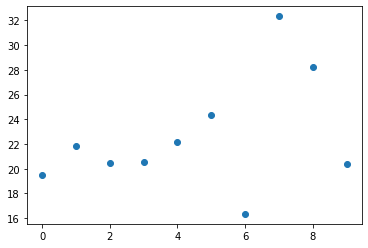

In [227]:
plt.scatter(x=job_type_num[0:10], y=job_percents)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_title             373103 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [229]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

Assigns numerical values to the emp_length column based on the categorical number of years provided.

In [230]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [234]:
emp_length = []
for i in df['emp_length']:
    
    if i == "< 1 year":
        
        emp_length.append(0)
        
    
    elif i == "1 year":
        
        emp_length.append(1)
        
        
    elif i == "2 years":
        
        emp_length.append(2)
        
    elif i == "3 years":
        
        emp_length.append(3)
        
    elif i == "4 years":
        
        emp_length.append(4)
    
    elif i == "5 years":
        
        emp_length.append(5)
        
    elif i == "6 years":
        
        emp_length.append(6)
        
    elif i == "7 years":
        
        emp_length.append(7)
        
    elif i == "8 years":
        
        emp_length.append(8)
        
    elif i == "9 years":
        
        emp_length.append(9)
        
    elif i == "10+ years":
        
        emp_length.append(10)
    else:
        
        emp_length.append(median_length)
   
 
   

In [232]:
emp_length = np.array(emp_length)

In [233]:
median_length = np.median(emp_length)

In [235]:
emp_length

[10,
 4,
 0,
 6,
 9,
 10,
 2,
 10,
 10,
 3,
 2,
 8,
 7,
 10,
 9,
 8,
 10,
 10,
 10,
 7,
 0,
 10,
 5,
 10,
 5,
 2,
 6,
 3,
 10,
 10,
 10,
 5,
 1,
 3,
 10,
 6.0,
 6.0,
 10,
 7,
 4,
 4,
 10,
 2,
 10,
 10,
 0,
 10,
 10,
 3,
 6.0,
 8,
 8,
 9,
 2,
 7,
 3,
 6,
 9,
 6.0,
 3,
 7,
 10,
 10,
 9,
 5,
 10,
 5,
 1,
 3,
 10,
 2,
 3,
 5,
 0,
 10,
 1,
 10,
 1,
 4,
 9,
 8,
 7,
 4,
 6,
 6,
 5,
 3,
 5,
 8,
 10,
 4,
 6.0,
 0,
 7,
 10,
 10,
 7,
 10,
 10,
 7,
 10,
 9,
 10,
 9,
 6,
 7,
 8,
 9,
 10,
 10,
 6,
 10,
 10,
 1,
 10,
 0,
 2,
 1,
 5,
 3,
 4,
 10,
 3,
 10,
 1,
 2,
 10,
 6,
 10,
 7,
 10,
 10,
 0,
 10,
 10,
 10,
 2,
 2,
 4,
 0,
 10,
 10,
 6,
 4,
 10,
 2,
 3,
 2,
 5,
 1,
 2,
 2,
 7,
 10,
 10,
 6.0,
 10,
 4,
 10,
 10,
 5,
 10,
 3,
 10,
 3,
 6,
 6,
 10,
 6.0,
 10,
 8,
 10,
 10,
 10,
 6,
 6,
 5,
 10,
 8,
 3,
 9,
 10,
 1,
 1,
 7,
 2,
 10,
 6.0,
 3,
 4,
 4,
 10,
 7,
 2,
 3,
 10,
 5,
 10,
 10,
 5,
 6,
 4,
 0,
 5,
 3,
 1,
 10,
 9,
 10,
 1,
 10,
 9,
 8,
 2,
 10,
 3,
 9,
 0,
 6.0,
 7,
 10,
 10,
 10,
 10,
 10,
 10,

In [236]:
len(emp_length)

396030

In [237]:
emp_length_df = df['emp_length'].to_numpy()

In [238]:
df['emp_length'] = df['emp_length'].replace(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'], [10,4,0,6,9,2,3,8,7,5,1])

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_title             373103 non-null  object 
 6   emp_length            377729 non-null  float64
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [240]:
df['emp_length'].fillna(df['emp_length'].mean(), inplace = True)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_title             373103 non-null  object 
 6   emp_length            396030 non-null  float64
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

Analyzes the home ownership column and sees which home ownership types have a high percentage of loan failures. Numerical values are assigned to the text categories based on those percentages.

In [242]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

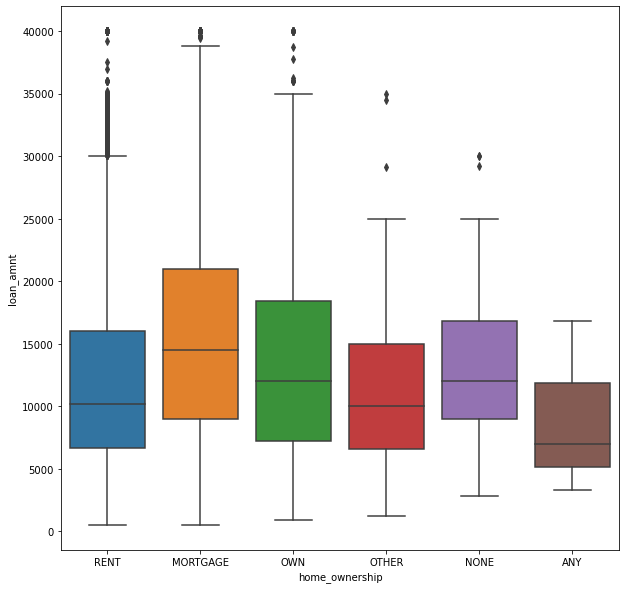

In [243]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['home_ownership'], y=df['loan_amnt'])

In [244]:
def home_loan_fail(ownership):
    paid = 0
    charged = 0
    
    for x,y in zip(df['home_ownership'],df['loan_status']):
     
        if x == ownership and y == "Fully Paid":
            
            paid += 1
            
        if x == ownership and y == "Charged Off":
            
            charged += 1
            
    #print(charged,paid)    
    return (charged)/(paid+charged) *100.0

In [245]:
for i in df['home_ownership'].unique():
    
    print(i)
    print(home_loan_fail(str(i)))

RENT
22.662244195506602
MORTGAGE
16.956057031076693
OWN
20.680336989349865
OTHER
14.285714285714285
NONE
22.58064516129032
ANY
0.0


In [246]:
ownership = []

for i in df['home_ownership'].unique():
    
    
    if i == "ANY":
        
        ownership.append(0)
    
    if i == "OTHER":
        
        ownership.append(1)
    
    if i == "MORTGAGE":
        
        ownership.append(2)
        
    if i == "OWN":
        
        ownership.append(3)
        
    if i == "RENT":
        
        ownership.append(4)
    
    if i=="NONE":
        ownership.append(5)

In [247]:
df['home_ownership'] = df['home_ownership'].replace(df['home_ownership'].unique(), ownership)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_title             373103 non-null  object 
 6   emp_length            396030 non-null  float64
 7   home_ownership        396030 non-null  int64  
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [249]:
df['loan_status'] = df['loan_status'].replace(["Fully Paid", "Charged Off"], [0,1])

Displays another heatmap to show the correlation of the newly feature engineered features.

<AxesSubplot:>

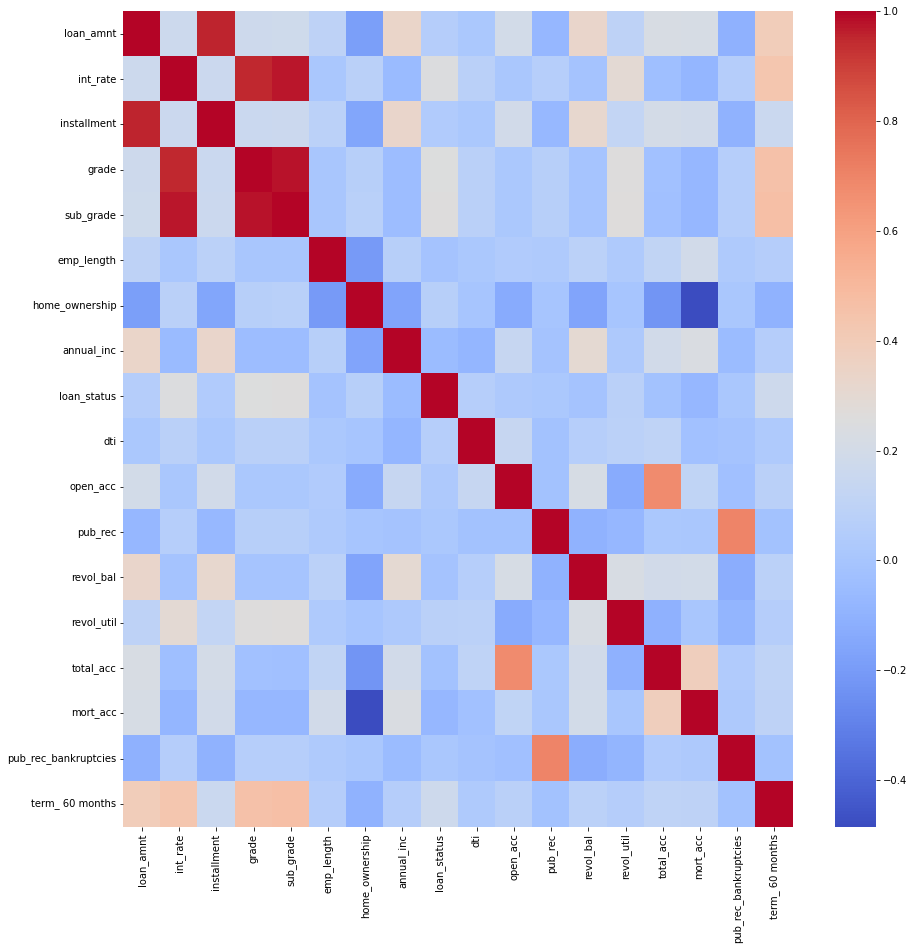

In [250]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap="coolwarm")

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_title             373103 non-null  object 
 6   emp_length            396030 non-null  float64
 7   home_ownership        396030 non-null  int64  
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  int64  
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

Creates numeric values for the verification status categories in the column. Values are determined by the percent of the loans for that verification type which fail.

In [252]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [253]:
df['verification_status']

0            Not Verified
1            Not Verified
2         Source Verified
3            Not Verified
4                Verified
               ...       
396025    Source Verified
396026    Source Verified
396027           Verified
396028           Verified
396029           Verified
Name: verification_status, Length: 396030, dtype: object

In [254]:
def verification_loan_fail(verification: str):
    paid = 0
    charged = 0
    
    for x,y in zip(df['verification_status'],df['loan_status']):
     
        if x == verification and y == 0:
            
            paid += 1
            
        if x == verification and y == 1:
            
            charged += 1
            
    #print(charged,paid)    
    return (charged)/(paid+charged) *100.0

In [255]:
verification_loan_fail("Verified")

22.321102297886974

In [256]:
verification_loan_fail("Source Verified")

21.474293108041252

In [257]:
verification_loan_fail("Not Verified")

14.635998784797172

In [258]:
def loan_fail():
    paid = 0
    charged = 0
    
    for x,y in zip(df['verification_status'],df['loan_status']):
     
        if y == 0:
            
            paid += 1
            
        if y == 1:
            
            charged += 1
            
    #print(charged,paid)    
    return (charged)/(paid+charged) *100.0

In [259]:
loan_fail()

19.61290811302174

In [260]:
df['verification_status'] = df['verification_status'].replace(['Not Verified', 'Source Verified', 'Verified'], [0,1,2])

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_title             373103 non-null  object 
 6   emp_length            396030 non-null  float64
 7   home_ownership        396030 non-null  int64  
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  int64  
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  int64  
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [262]:
df['loan_status'].corr(df['verification_status'])

0.0779086446212551

Takes the string values for issuing date of the loan, and gets only the year.

In [263]:
df['issue_d'].unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [264]:
df['issue_d'] = pd.DatetimeIndex(df['issue_d'])

In [265]:
df['issue_d'].value_counts()

2014-10-01    14846
2014-07-01    12609
2015-01-01    11705
2013-12-01    10618
2013-11-01    10496
              ...  
2007-07-01       26
2008-09-01       25
2007-11-01       22
2007-09-01       15
2007-06-01        1
Name: issue_d, Length: 115, dtype: int64

In [266]:
years = []

for i in df['issue_d'].unique():
    
    years.append(i.astype('datetime64[Y]').astype(int) + 1970)
    

In [267]:
df['issue_d'] = df['issue_d'].replace(df['issue_d'].unique(), years)

In [268]:
df['issue_d'].corr(df['loan_status'])

0.06050153046741689

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_title             373103 non-null  object 
 6   emp_length            396030 non-null  float64
 7   home_ownership        396030 non-null  int64  
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  int64  
 10  issue_d               396030 non-null  int64  
 11  loan_status           396030 non-null  int64  
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [270]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [271]:
def purpose_loan_fail(purpose: str):
    paid = 0
    charged = 0
    
    for x,y in zip(df['purpose'],df['loan_status']):
     
        if x == purpose and y == 0:
            
            paid += 1
            
        if x == purpose and y == 1:
            
            charged += 1
            
    #print(charged,paid)    
    return (charged)/(paid+charged) *100.0

In [272]:
percents = []
for i in df['purpose'].unique():
    
    percents.append((i,purpose_loan_fail(i)))

In [273]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [274]:
percents.sort(key = lambda x: x[1])       

In [275]:
percents

[('wedding', 12.08609271523179),
 ('car', 13.47668724717905),
 ('educational', 16.342412451361866),
 ('major_purchase', 16.47326507394767),
 ('credit_card', 16.711837049350148),
 ('home_improvement', 17.007906783187682),
 ('vacation', 18.92332789559543),
 ('house', 19.718309859154928),
 ('debt_consolidation', 20.74138511856789),
 ('other', 21.217842813311304),
 ('medical', 21.71115347950429),
 ('renewable_energy', 23.404255319148938),
 ('moving', 23.475823405746322),
 ('small_business', 29.4509735134187)]

In [276]:
percent_ints = []
for i,y in zip(percents, range(0,len(percents))):
    #print(i)
    percent_ints.append((i[0],y))

In [277]:
change_nums = []
for x in df['purpose'].unique():
    
    for y in percent_ints:
        
        if y[0] == x:
            
            change_nums.append(y[1])


In [278]:
df['purpose'] = df['purpose'].replace(df['purpose'].unique(), change_nums)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_title             373103 non-null  object 
 6   emp_length            396030 non-null  float64
 7   home_ownership        396030 non-null  int64  
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  int64  
 10  issue_d               396030 non-null  int64  
 11  loan_status           396030 non-null  int64  
 12  purpose               396030 non-null  int64  
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [280]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [281]:
len(df['title'].unique())

48818

In [282]:
df['earliest_cr_line'].unique()

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

In [283]:
df['earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line'])

In [284]:
years = []

for i in df['earliest_cr_line'].unique():
    
    years.append(i.astype('datetime64[Y]').astype(int) + 1970)

In [285]:
df['earliest_cr_line'] = df['earliest_cr_line'].replace(df['earliest_cr_line'].unique(), years)

<AxesSubplot:xlabel='loan_status', ylabel='earliest_cr_line'>

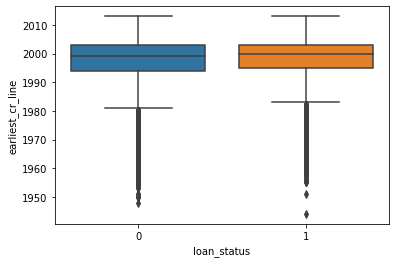

In [286]:
sns.boxplot(x=df['loan_status'], y=df['earliest_cr_line'])

In [287]:
df['loan_status'].corr(df['earliest_cr_line'])

0.038927904317216024

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_title             373103 non-null  object 
 6   emp_length            396030 non-null  float64
 7   home_ownership        396030 non-null  int64  
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  int64  
 10  issue_d               396030 non-null  int64  
 11  loan_status           396030 non-null  int64  
 12  purpose               396030 non-null  int64  
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [289]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [290]:
df['initial_list_status'] = df['initial_list_status'].replace(['w','f'], [0,1])

In [291]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [292]:
df['application_type'] = df['application_type'].replace(df['application_type'].unique(), [0,1,2])

In [300]:
len(df['address'].unique())

393700

In [307]:
zipcodes = []

for i in df['address']:
    
    zipcodes.append(i[len(i)-5:])

In [308]:
len(zipcodes)

396030

In [309]:
df['zipcode'] = zipcodes

In [310]:
zipcodes = pd.get_dummies(df['zipcode'], drop_first = True)
df = df.drop(['address', 'zipcode'], axis=1)
df = pd.concat([df,zipcodes],axis=1)

In [311]:
df = df.drop([ 'emp_title', 'title'], axis=1)

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_length            396030 non-null  float64
 6   home_ownership        396030 non-null  int64  
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  int64  
 9   issue_d               396030 non-null  int64  
 10  loan_status           396030 non-null  int64  
 11  purpose               396030 non-null  int64  
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  int64  
 14  open_acc              396030 non-null  float64
 15  

In [313]:
df.shape

(396030, 33)

In [314]:
data.to_numpy

<bound method DataFrame.to_numpy of                                                             Description
LoanStatNew                                                            
loan_amnt             The listed amount of the loan applied for by t...
term                  The number of payments on the loan. Values are...
int_rate                                      Interest Rate on the loan
installment           The monthly payment owed by the borrower if th...
grade                                            LC assigned loan grade
sub_grade                                     LC assigned loan subgrade
emp_title             The job title supplied by the Borrower when ap...
emp_length            Employment length in years. Possible values ar...
home_ownership        The home ownership status provided by the borr...
annual_inc            The self-reported annual income provided by th...
verification_status   Indicates if income was verified by LC, not ve...
issue_d                     

<AxesSubplot:xlabel='mort_acc', ylabel='Count'>

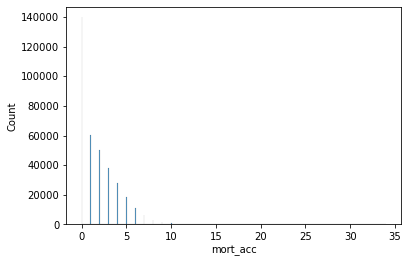

In [315]:
sns.histplot(df['mort_acc'])

In [316]:
df['mort_acc'] = df["mort_acc"].fillna(0.0)

In [317]:
df.groupby('open_acc').mean()['mort_acc']

open_acc
0.0     0.500000
1.0     0.929412
2.0     0.469500
3.0     0.643738
4.0     0.872164
          ...   
56.0    1.500000
57.0    3.000000
58.0    6.000000
76.0    1.000000
90.0    2.000000
Name: mort_acc, Length: 61, dtype: float64

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

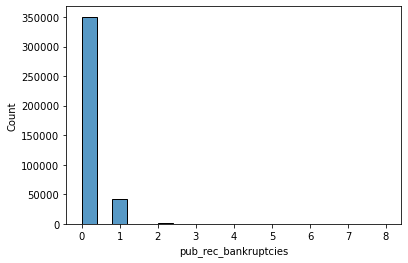

In [318]:
sns.histplot(df['pub_rec_bankruptcies'])

In [319]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_length            396030 non-null  float64
 6   home_ownership        396030 non-null  int64  
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  int64  
 9   issue_d               396030 non-null  int64  
 10  loan_status           396030 non-null  int64  
 11  purpose               396030 non-null  int64  
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  int64  
 14  open_acc              396030 non-null  float64
 15  

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

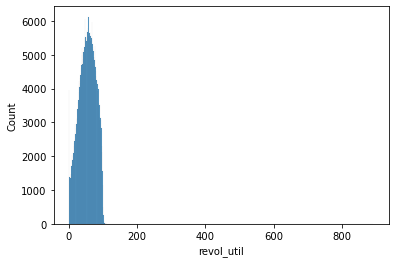

In [321]:
sns.histplot(df['revol_util'])

In [322]:
np.median(df['revol_util'])

nan

In [323]:
df['revol_util'].mean()

53.79174863677942

In [324]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_length            396030 non-null  float64
 6   home_ownership        396030 non-null  int64  
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  int64  
 9   issue_d               396030 non-null  int64  
 10  loan_status           396030 non-null  int64  
 11  purpose               396030 non-null  int64  
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  int64  
 14  open_acc              396030 non-null  float64
 15  

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

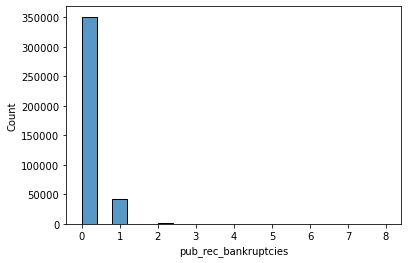

In [326]:
sns.histplot(df['pub_rec_bankruptcies'])

In [327]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350915
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int64  
 4   sub_grade             396030 non-null  int64  
 5   emp_length            396030 non-null  float64
 6   home_ownership        396030 non-null  int64  
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  int64  
 9   issue_d               396030 non-null  int64  
 10  loan_status           396030 non-null  int64  
 11  purpose               396030 non-null  int64  
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  int64  
 14  open_acc              396030 non-null  float64
 15  

In [329]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mean())

In [330]:
from tensorflow.keras.models import Sequential

In [331]:
from tensorflow.keras.layers import Dense,Activation,Dropout

In [332]:
from sklearn.model_selection import train_test_split

In [333]:
df

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,term_ 60 months,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,11.44,329.48,1,8,10.0,4,117000.0,0,2015,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,11.99,265.68,1,9,4.0,2,65000.0,0,2015,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,1,7,0.0,4,43057.0,1,2015,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,0,1,6.0,4,54000.0,0,2014,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,609.33,2,14,9.0,2,55000.0,2,2013,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,1,8,2.0,4,40000.0,1,2015,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,12.29,700.42,2,10,5.0,2,110000.0,1,2015,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,9.99,161.32,1,5,10.0,4,56500.0,2,2013,...,0,0,0,0,0,0,0,1,0,0
396028,21000.0,15.31,503.02,2,11,10.0,2,64000.0,2,2012,...,1,0,0,0,1,0,0,0,0,0


In [334]:
X = df.drop(['loan_status'], axis=1).values
y = df['loan_status'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

In [335]:
X_train

array([[1.8600e+04, 1.5880e+01, 6.5282e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.6400e+04, 1.1530e+01, 8.7095e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+04, 1.2990e+01, 3.3690e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+04, 1.0990e+01, 6.5468e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.2800e+04, 7.9000e+00, 4.0052e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.5000e+03, 1.2120e+01, 3.1609e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [385]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [386]:
X_train = scaler.fit_transform(X_train)

In [387]:
X_test = scaler.fit_transform(X_test)

In [388]:
X_train.shape

(277221, 32)

In [401]:
model = Sequential()

In [402]:
model.add(Dense(32, activation = "relu"))

In [403]:
model.add(Dropout(0.3))

In [404]:
model.add(Dense(16, activation = "relu"))

In [405]:
model.add(Dropout(0.2))

In [406]:
model.add(Dense(8, activation = "relu"))

In [407]:
model.add(Dropout(0.1))

In [408]:
model.add(Dense(units = 1, activation = "sigmoid"))

In [409]:
model.compile(loss="binary_crossentropy", optimizer = "adam")

In [410]:
from tensorflow.keras.callbacks import EarlyStopping

In [411]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=20)

In [412]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          validation_data=(X_test, y_test), verbose=2,
          callbacks=[early_stop],
          batch_size = 256
          )

Epoch 1/25
1083/1083 - 8s - loss: 0.3128 - val_loss: 0.2620
Epoch 2/25
1083/1083 - 7s - loss: 0.2671 - val_loss: 0.2579
Epoch 3/25
1083/1083 - 8s - loss: 0.2631 - val_loss: 0.2576
Epoch 4/25
1083/1083 - 8s - loss: 0.2606 - val_loss: 0.2560
Epoch 5/25
1083/1083 - 4s - loss: 0.2597 - val_loss: 0.2562
Epoch 6/25
1083/1083 - 4s - loss: 0.2588 - val_loss: 0.2557
Epoch 7/25
1083/1083 - 4s - loss: 0.2581 - val_loss: 0.2554
Epoch 8/25
1083/1083 - 6s - loss: 0.2579 - val_loss: 0.2551
Epoch 9/25
1083/1083 - 5s - loss: 0.2574 - val_loss: 0.2549
Epoch 10/25
1083/1083 - 5s - loss: 0.2569 - val_loss: 0.2544
Epoch 11/25
1083/1083 - 6s - loss: 0.2568 - val_loss: 0.2548
Epoch 12/25
1083/1083 - 6s - loss: 0.2568 - val_loss: 0.2548
Epoch 13/25
1083/1083 - 5s - loss: 0.2564 - val_loss: 0.2549
Epoch 14/25
1083/1083 - 5s - loss: 0.2560 - val_loss: 0.2549
Epoch 15/25
1083/1083 - 5s - loss: 0.2563 - val_loss: 0.2550
Epoch 16/25
1083/1083 - 6s - loss: 0.2561 - val_loss: 0.2541
Epoch 17/25
1083/1083 - 6s - loss

In [450]:
predictions = model.predict(X_test)

<AxesSubplot:ylabel='Count'>

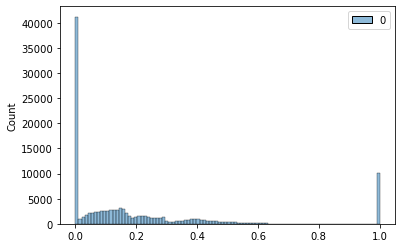

In [451]:
sns.histplot(predictions)

In [452]:
for i in range(0,len(predictions)):
    
    if predictions[i] > 0.5:
        
        predictions[i] = 1
    
    else:
        
        predictions[i] = 0

<AxesSubplot:ylabel='Count'>

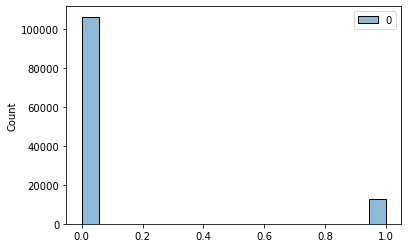

In [453]:
sns.histplot(predictions)

In [454]:
from sklearn.metrics import classification_report

In [456]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     95549
           1       0.90      0.49      0.63     23260

    accuracy                           0.89    118809
   macro avg       0.90      0.74      0.79    118809
weighted avg       0.89      0.89      0.88    118809



In [419]:
from sklearn.metrics import confusion_matrix

In [457]:
print(confusion_matrix(y_test,predictions))

[[94350  1199]
 [11884 11376]]


In [428]:
from sklearn.linear_model import LogisticRegression

In [429]:
reg = LogisticRegression()

In [430]:
reg.fit(X_train, y_train)

C:\Users\anime\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [432]:
predictions = reg.predict(X_test)

<AxesSubplot:ylabel='Count'>

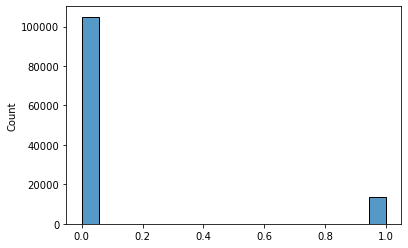

In [433]:
sns.histplot(predictions)

In [449]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     95549
           1       0.86      0.51      0.64     23260

    accuracy                           0.89    118809
   macro avg       0.88      0.75      0.79    118809
weighted avg       0.89      0.89      0.88    118809



In [448]:
print(confusion_matrix(y_test,predictions))

[[93598  1951]
 [11376 11884]]
